
# Project: No Show Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report, we will look at the dataset for the numbers of patients who are made an appointment to come to the hospital. Somehow many patients don't show up in their appointment. In the dataset, we have some attributes that will help us to analyze and explore the data and come to a conclusion.

##### The questions that we have:
>>What is the percentage of patients who were attended versus those who didn't attend?

>>Dose the people with diabetes have a high chance to not attend the appointment?

>>What is the average age of the patients who were attended versus those who didn't attend?

In [1]:
# import pandas , numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import csv
from datetime import datetime as dt
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

>Load dataset from CSV file

In [2]:
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>Number of samples in dataset

In [3]:
# this returns a tuple of the dimensions of the dataframe
df.shape

(110527, 14)

>Describe

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>Check for the datatype and features with missing values


In [5]:
df.info()
# After checking AppointmentDay and ScheduledDay having wrong data type, however, these columns will not use them in the analysis
# Also there's no null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>Show first 5 rows

In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>Appointment ID should be unique number
>> No Duplicate

In [7]:
sum(df['AppointmentID'].duplicated())

0

> Check if there any age less than or equal 0 

In [8]:
# Check if there any age <= 0
df[df['Age'] <= 0]
# 3540 records having wrong age number

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


> Delete some columns because we'll not use them in data analysis

In [9]:
df.drop(['PatientId','AppointmentID','ScheduledDay','ScheduledDay'], axis = 1, inplace=True)

### Data Cleaning

>Rename some spelling errors in the columns

In [10]:
# rename No-show Handicap Hypertension Typo
df.rename(columns={'No-show':'No_show'}, inplace=True)
df.rename(columns={'Handcap':'Handicap'}, inplace=True)
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)

In [11]:
# Some records having Zero in Age column witch is wrong
df[df.Age <= 0]

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
59,F,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,M,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,M,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,M,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,F,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...
110345,F,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,M,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,F,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,F,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [12]:
#remove all records with 0 or less than 0 from Dataframe
df = df[(df.Age > 0)]

In [13]:
df
#Total number of records after removing 106987

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


>Change No_Show column from 'Yes' = 1 & 'No' = 0 & change the data type
>>And Data type to numeric

In [14]:
# Change No_Show column from 'Yes' = 1 & 'No' = 0
df['No_show'] = df['No_show'].apply(lambda x: 0 if x=='No' else 1)
# Change Data type to numaric 
df['No_show'] = pd.to_numeric(df['No_show'])

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the percentage of patients who attended versus those who didn't attend?)

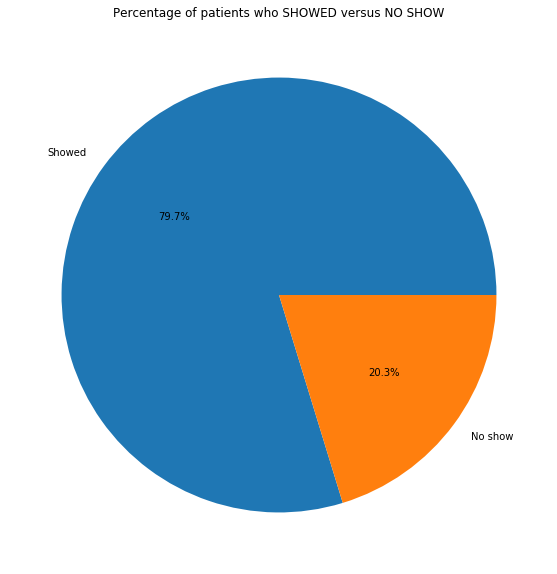

In [15]:
plt.figure(figsize=(20,10))
values = df['No_show'].value_counts()
labels = ['Showed', 'No show'] 
plt.pie(values, labels=labels, autopct='%.1f%%');
plt.title('Percentage of patients who SHOWED versus NO SHOW')
plt.show()

In [16]:
df['No_show'].value_counts()

0    85307
1    21680
Name: No_show, dtype: int64

### Research Question 2  (What is the average age of the patients who were attended versus those who didn't attend? )

>To answer this question, First we need to create two data frames, One with showed patients and other with no show patients.

In [17]:
#Create two Datafarme 
df_showed  = df[(df['No_show'] == 1)]
df_no_show = df[(df['No_show'] == 0)]
# 85307 showed 
# 21680 No Show 

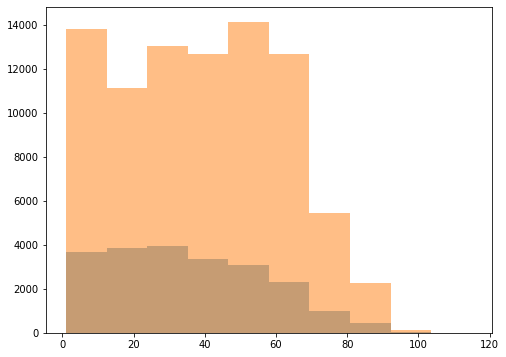

In [18]:
fig , ax = plt.subplots(figsize=(8, 6))
ax.hist(df_showed['Age'],alpha = 0.5, label = "Showed");
ax.hist(df_no_show['Age'],alpha = 0.5, label = "No Show");

In [19]:
df_showed.Age.mean()

35.329151291512915

In [20]:
df_no_show.Age.mean()

39.07518726482

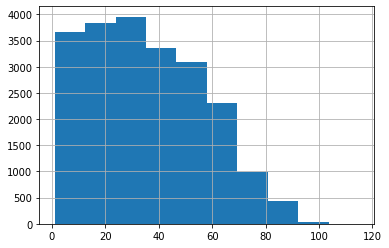

In [21]:
df_showed.Age.hist()

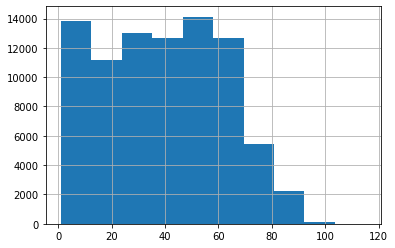

In [22]:
df_no_show.Age.hist()

We can see from the graph that older people have a high chance to attend their appointment

### Research Question 3  (Dose the patients with Diabetes have a high chance to not attend the appointment? )

In [23]:
#Create two Datafarme 
# 1 -patients with diabetes and showed
# 2 -patients with diabetes and no showed
df_showed_Diabetes  = df_showed[(df_showed['Diabetes'] == 1)]
df_no_show_Diabetes = df_no_show[(df_no_show['Diabetes'] == 1)]

In [24]:
df_showed_Diabetes

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
44,F,2016-04-29T00:00:00Z,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,1
126,F,2016-04-29T00:00:00Z,67,PRAIA DO SUÁ,0,0,1,0,0,0,1
212,M,2016-04-29T00:00:00Z,62,SANTOS DUMONT,0,1,1,0,0,0,1
463,F,2016-04-29T00:00:00Z,66,SÃO CRISTÓVÃO,0,1,1,0,0,0,1
619,F,2016-04-29T00:00:00Z,67,PRAIA DO CANTO,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
109927,F,2016-06-08T00:00:00Z,76,BONFIM,0,1,1,0,0,0,1
109956,M,2016-06-07T00:00:00Z,94,CARATOÍRA,0,1,1,0,0,1,1
110062,F,2016-06-02T00:00:00Z,42,TABUAZEIRO,1,0,1,0,0,1,1
110129,F,2016-06-08T00:00:00Z,61,COMDUSA,0,1,1,0,0,0,1


In [25]:
df_no_show_Diabetes

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0
36,F,2016-04-29T00:00:00Z,63,SÃO CRISTÓVÃO,0,1,1,0,0,0,0
37,F,2016-04-29T00:00:00Z,64,TABUAZEIRO,1,1,1,0,0,0,0
41,F,2016-04-29T00:00:00Z,71,MARUÍPE,0,0,1,0,0,0,0
47,F,2016-04-29T00:00:00Z,39,MARUÍPE,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
110448,F,2016-06-06T00:00:00Z,40,RESISTÊNCIA,0,1,1,0,0,1,0
110456,F,2016-06-03T00:00:00Z,79,RESISTÊNCIA,0,1,1,0,0,0,0
110468,F,2016-06-07T00:00:00Z,76,RESISTÊNCIA,0,1,1,0,0,1,0
110477,F,2016-06-06T00:00:00Z,67,RESISTÊNCIA,0,0,1,0,0,1,0


Perform a stacked bar graph with percentage & using group by function

In [26]:
F_Serie = df.groupby('Diabetes')['No_show'].value_counts()[0]
M_Serie = df.groupby('Diabetes')['No_show'].value_counts()[1]
M_Serie = M_Serie*(100/M_Serie.sum())
F_Serie = F_Serie*(100/F_Serie.sum())

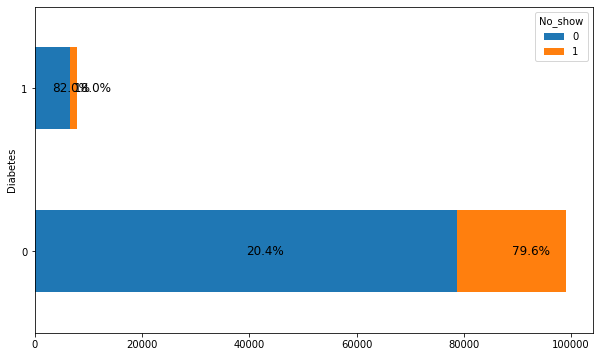

In [27]:
df2 = pd.DataFrame(np.array([list(F_Serie), list(M_Serie)]), index = [0, 1], columns = [0, 1])

ax = df.groupby('Diabetes')['No_show'].value_counts().unstack(level=1).plot.barh(stacked=True, figsize=(10, 6))
# Set txt
kx = -0.3
ky = -0.02

values = []
for key in df2.values:
    values = values + list(key)
# ordering the values    
val = values[1:3]
values.pop(1)
values.pop(1)
values = val + values


for i,rec in enumerate(ax.patches):
    ax.text(rec.get_xy()[0]+rec.get_width()/2+kx,rec.get_xy()[1]+rec.get_height()/2+ky,'{:.1%}'.format(values[i]/100), fontsize=12, color='black')

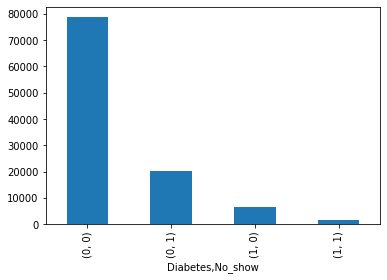

In [28]:
F_Serie = df.groupby('Diabetes')['No_show'].value_counts()
F_Serie.plot.bar()

In [29]:
F_Serie

Diabetes  No_show
0         0          78794
          1          20250
1         0           6513
          1           1430
Name: No_show, dtype: int64

<a id='conclusions'></a>
## Conclusions

In conclusion, about 79.7% of patients didn't make it to their appointment furthermore, after the investigation we can see that the patients with older age have a high chance to show up in their appointment than younger age patients. In addition, about 82% of patients with diabetes didn't show up in their appointment.   

Reference:

https://stackoverflow.com/questions/57453959/how-to-show-percentages-on-the-stacked-bar-chart-in-python-3-x
